# Initial Code to differentiate between a car and a bus


This code is a test version of learning from the sample lecture of detecting the differences between a bird and anything else

In [18]:
# let us prepare the dependencies we need for this script
!pip install -Uqq fastai duckduckgo_search

In [19]:
from duckduckgo_search import ddg_images
from fastcore.all import *

# this function is to search and return images using the duckduckgo library
def search_images(term, count = 30):
    print(f"Searching for images of type '{term}'")
    return L(ddg_images(term, count)).itemgot('image')

car_urls = search_images("car photos", 1)
car_urls[0]

Searching for images of type 'car photos'


'https://digitalsynopsis.com/wp-content/uploads/2014/06/supercar-wallpapers-bugatti-3.jpg'

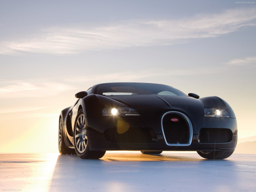

In [20]:
from fastdownload import download_url
dest = 'car.jpg'
download_url(car_urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256, 256)

Searching for images of type 'bus photos'


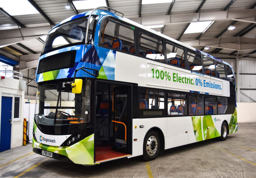

In [21]:
download_url(search_images("bus photos", 1)[0], 'bus.jpg', show_progress=False)
Image.open('bus.jpg').to_thumb(256, 256)

In [22]:
searches = "car", "bus"
path = Path("image-searches")
from time import sleep

for search in searches:
    dest = (path/search)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f"{search} photo", 50))
    sleep(10) # sleep 10 seconds to avoid overloading the server
    download_images(dest, urls=search_images(f"{search} sun photo", 50))
    sleep(10)
    download_images(dest, urls=search_images(f"{search} shade photo", 50))
    sleep(10)
    resize_images(dest,max_size= 400, dest=dest)

Searching for images of type 'car photo'
Searching for images of type 'car sun photo'
Searching for images of type 'car shade photo'
Searching for images of type 'bus photo'
Searching for images of type 'bus sun photo'
Searching for images of type 'bus shade photo'


# Training our model

In [23]:
failedImages = verify_images(get_image_files(path))
failedImages.map(Path.unlink)
len(failedImages)

14

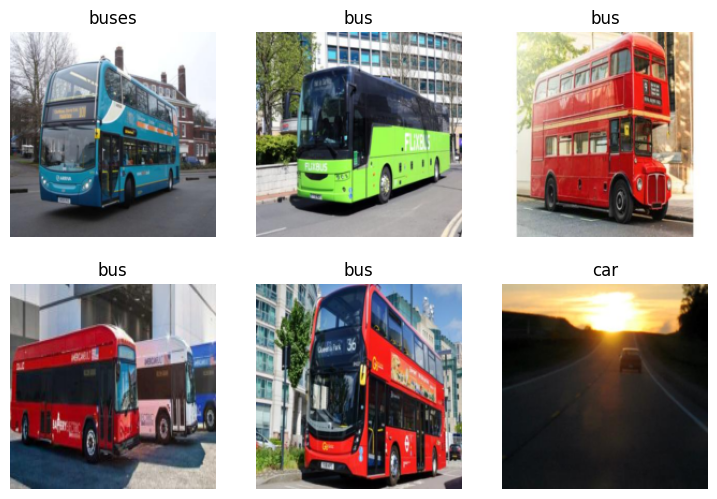

In [24]:
dls = DataBlock(
    blocks=[ImageBlock, CategoryBlock],
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path,bs=32)

dls.show_batch(max_n=6)

In [25]:
model = vision_learner(dls,resnet18, metrics=error_rate)
model.fine_tune(3)

In [26]:
is_car,_,probability = model.predict(PILImage.create("car.jpg"))
print(f"This is a: {is_car}, with probability {probability[0]:.4f}.")

This is a: car, with probability 0.0000.


In [ ]:
# test integration with an upload button
uploader = widgets.Uploader
uploader

In [ ]:
img = PILImage.create(uploader.data[0])
is_car,_,probability = model.predict(img);
print(f"This is a: {is_car}, with probability {probability[0]:.4f}.")